### 빈 칸 채우기(실행 X)

In [40]:
# import pandas as pd

# emart_df = pd.read_csv("eda_final_emartmall.csv")
# emart_df = emart_df.drop(columns=["ID", "카테고리", "상품 상세 URL", "이미지 URL", "정은 비고", "선웅 비고- 성분", "민지 비고", "선웅 비고- 영양", "순서 유지 비고"])

# # footer 이미지 제거
# emart_df["product"] = emart_df["img-ID"].str.extract(r"emart-(\d+)-")[0].astype(int)
# emart_df["image"] = emart_df["img-ID"].str.extract(r"emart-\d+-(\d+)")[0].astype(int)
# last_images = emart_df.groupby("product")["image"].transform(max) == emart_df["image"]
# emart_df = emart_df[~last_images]

# ##### 빈칸 채우기
# # 개별 이미지에 대해 성분 정보 여부, 영양 정보 여부 둘 중 하나라도 O라면 OCR O, 상품 설명 X
# ocr_description = (
#     (emart_df["전체/개별"] == "개별") &
#     ((emart_df["성분 정보 여부"] == "O") | (emart_df["영양 정보 여부"] == "O"))
# )
# emart_df.loc[ocr_description, "OCR 필요 여부"] = "O"
# emart_df.loc[ocr_description, "상품 설명"] = "X"

# curr_id = ""
# for idx, row in emart_df.iterrows():
#     if row["전체/개별"] == "전체":
#         curr_id = row["img-ID"]
#         continue

#     # 크롭이 필요한 이미지가 하나라도 있을 경우, 해당 상품의 크롭 필요 여부 O
#     if row["크롭 필요 여부"] == "O":
#         emart_df.loc[emart_df["img-ID"] == curr_id, "크롭 필요 여부"] = "O"

#     # 크기 정보를 제공하는 이미지가 하나라도 있을 경우, 해당 상품의 크기 정보 제공 여부 O
#     if row["크기 정보 제공 여부"] == "O":
#         emart_df.loc[emart_df["img-ID"] == curr_id, "크기 정보 제공 여부"] = "O"

#     # 보관 정보를 제공하는 이미지가 하나라도 있을 경우, 해당 상품의 보관 정보 O
#     if row["보관 정보"] != "없음":
#         emart_df.loc[emart_df["img-ID"] == curr_id, "보관 정보"] = "O"

#     # OCR 필요 여부가 하나라도 있을 경우, 해당 상품의 OCR 필요 여부 O
#     if row["OCR 필요 여부"] == "O":
#         emart_df.loc[emart_df["img-ID"] == curr_id, "OCR 필요 여부"] = "O"
    
#     # 상품 설명을 제공하는 이미지가 하나라도 있을 경우, 해당 상품의 상품 설명 O
#     if row["상품 설명"] == "O":
#         emart_df.loc[emart_df["img-ID"] == curr_id, "상품 설명"] = "O"

# emart_df.loc[emart_df["상품 설명"] != "O", "상품 설명"] = "X"
# emart_df.loc[(emart_df["전체/개별"]=="전체") & (emart_df["보관 정보"] != "O"), "보관 정보"] = "X"

# emart_df.loc[emart_df["크롭 필요 여부"] != "O", "크롭 필요 여부"] = "X" # 크롭 필요 여부가 빈칸이라면 X
# emart_df.loc[emart_df["크기 정보 제공 여부"] != "O", "크기 정보 제공 여부"] = "X" # 크기 정보 제공 여부가 빈칸이라면 X
# emart_df.loc[(emart_df["전체/개별"] == "개별") & (emart_df["성분 정보 여부"] != "O"), "성분 정보 여부"] = "X"
# emart_df.loc[(emart_df["전체/개별"] == "개별") & (emart_df["영양 정보 여부"] != "O"), "영양 정보 여부"] = "X"

# emart_df.to_csv("eda_final_emartmall_full.csv", index=False)
# emart_df.head()

### 이마트몰 EDA

In [41]:
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False
seaborn_color = sns.color_palette("pastel") # Set2, pastel, husl

emart_df = pd.read_csv("eda_final_emartmall_full.csv", encoding="cp949")

product_len = len(emart_df[emart_df["전체/개별"]=="전체"])
image_len = len(emart_df[emart_df["전체/개별"]=="개별"])
print(f"총 상품 개수: {product_len}, 총 이미지 개수: {image_len}")
emart_df.head()

총 상품 개수: 389, 총 이미지 개수: 1656


,img-ID,상품명,전체/개별,순서 유지,썸네일 대표성,성분정보 개수,영양정보 개수,크롭 필요 여부,OCR 필요 여부,상품 설명,...,성분 노이즈,영양 정보 여부,영양 정보 양식,영양 선명,영양 노이즈,product,image,순서 유지 비고,상품 상세 URL,이미지 URL
0,emart-1-0,샤인머스켓 650g/팩,전체,X,O,단일,없음,X,O,X,...,NaN,NaN,NaN,NaN,NaN,1,0,성분 1 - 상품 2,https://shopping.naver.com/window-products/ema...,https://shop-phinf.pstatic.net/20240927_190/17...
1,emart-1-1,NaN,개별,X,NaN,NaN,NaN,X,X,X,...,없음,X,NaN,NaN,없음,1,1,NaN,NaN,https://salln-static.ssgcdn.com/ui/ssg/img/pro...
2,emart-1-2,NaN,개별,X,NaN,NaN,NaN,X,O,X,...,없음,X,NaN,NaN,없음,1,2,NaN,NaN,https://salln-item.ssgcdn.com/42/28/82/qlty/10...
3,emart-1-3,NaN,개별,X,NaN,NaN,NaN,X,X,X,...,없음,X,NaN,NaN,없음,1,3,NaN,NaN,https://salln-item.ssgcdn.com/42/28/82/item/10...
4,emart-1-4,NaN,개별,X,NaN,NaN,NaN,X,X,X,...,없음,X,NaN,NaN,없음,1,4,NaN,NaN,https://salln-item.ssgcdn.com/42/28/82/item/10...


## 메타
### 썸네일 대표성: O, X
### 영양 정보 개수/성분 정보 개수: 단일, 같은/유사한 내용, 다른 정보 여러 개, 없음

순서가 유지되는 상품들의 총 이미지 수: 1351


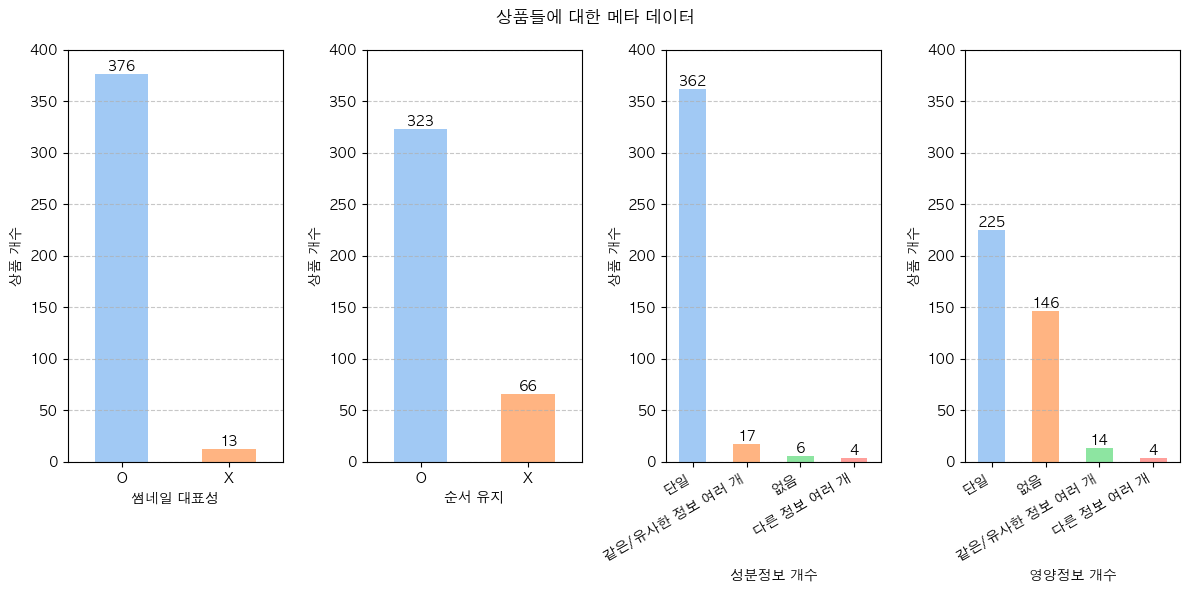

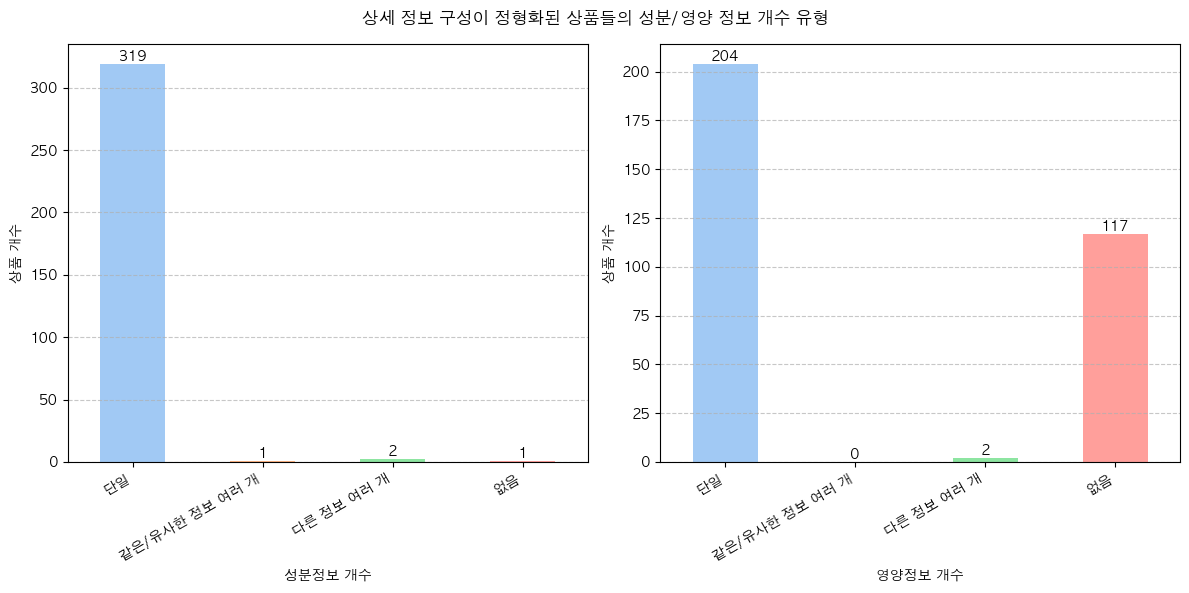

In [42]:
meta_df = emart_df[emart_df["전체/개별"]=="전체"][["썸네일 대표성", "순서 유지", "성분정보 개수", "영양정보 개수"]]

len_ordered_img = len(emart_df[(emart_df["전체/개별"]=="개별") & (emart_df["순서 유지"]=="O")])
print(f"순서가 유지되는 상품들의 총 이미지 수: {len_ordered_img}")

#####
plt.figure(figsize=(12, 6))

for idx, col in enumerate(meta_df.columns):
    plt.subplot(1, 4, idx+1)
    bars = meta_df[col].value_counts().plot(kind="bar", color=seaborn_color)

    cnt = 0
    for bar in bars.patches:
        cnt += bar.get_height()
        bars.annotate(f"{bar.get_height()}",
                    (bar.get_x() + bar.get_width()/2., bar.get_height()),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha="center",
                    va="bottom")
    
    if idx >= 2:
        plt.xticks(rotation=30, ha="right")
    else:
        plt.xticks(rotation=0, ha="center")
    plt.ylabel("상품 개수")
    plt.ylim([0, 400])
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle("상품들에 대한 메타 데이터")
plt.tight_layout()

#####
plt.figure(figsize=(12, 6))

for idx, col in enumerate(["성분정보 개수", "영양정보 개수"]):
    plt.subplot(1, 2, idx+1)
    bars = meta_df[meta_df["순서 유지"]=="O"][col].value_counts().reindex(["단일", "같은/유사한 정보 여러 개", "다른 정보 여러 개", "없음"]).plot(kind="bar", color=seaborn_color)
    
    for bar in bars.patches:
            bars.annotate(f"{int(bar.get_height())}",
                          (bar.get_x() + bar.get_width()/2., bar.get_height()),
                          xytext=(0, 0),
                          textcoords="offset points",
                          ha="center",
                          va="bottom")
    
    plt.xticks(rotation=30, ha="right")
    plt.ylabel("상품 개수")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.suptitle("상세 정보 구성이 정형화된 상품들의 성분/영양 정보 개수 유형")
plt.tight_layout()

In [43]:
##### 순서 유지 X인 경우, 어떤 구성을 갖는지 확인
# plt.figure(figsize=(12, 6))
# bars = emart_df[emart_df["순서 유지"]=="X"]["순서 유지 비고"].value_counts().plot(kind="bar", color=seaborn_color)

# cnt = 0
# for bar in bars.patches:
#     cnt += bar.get_height()
#     bars.annotate(f"{bar.get_height()}",
#                 (bar.get_x() + bar.get_width()/2., bar.get_height()),
#                 xytext=(0, 0),
#                 textcoords="offset points",
#                 ha="center",
#                 va="bottom")
# plt.xticks(rotation=30, ha="right")
# plt.ylabel("상품 개수")
# plt.ylim([0, 400])
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# plt.suptitle("상품들에 대한 메타 데이터")
# plt.tight_layout()

# emart_df[emart_df["순서 유지"]=="X"]["순서 유지 비고"].value_counts()

### 크롭 필요 여부: O, X
- 이마트몰은 대부분 X일 것
- 하나의 이미지에 대해 크롭 필요 여부가 O라면, 해당 상품 자체를 크롭 필요 여부 O로 구분
- 크롭 필요 여부 X인 이미지의 순서 유지 X 경향 확인

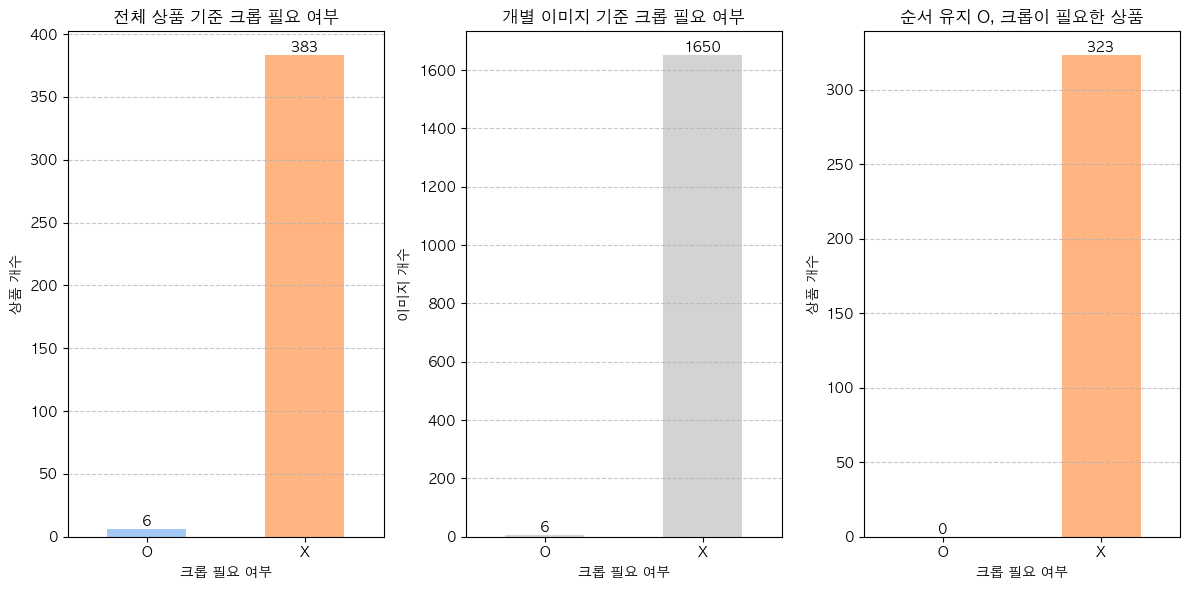

In [44]:
image_df = emart_df[["img-ID", "전체/개별", "순서 유지", "크롭 필요 여부", "OCR 필요 여부", "크기 정보 제공 여부", "상품 설명", "성분 정보 여부", "영양 정보 여부"]].copy()

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
bars = image_df[image_df["전체/개별"]=="전체"]["크롭 필요 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("전체 상품 기준 크롭 필요 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 크롭 필요 여부 O == 긴 이미지 1개 포함
plt.subplot(1, 3, 2)
bars = image_df[image_df["전체/개별"]=="개별"]["크롭 필요 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color="lightgray")
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("개별 이미지 기준 크롭 필요 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
bars = image_df[(image_df["전체/개별"]=="전체") & (image_df["순서 유지"]=="O")]["크롭 필요 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{int(bar.get_height())}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("순서 유지 O, 크롭이 필요한 상품")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### OCR 필요 여부: O, X & 상품 설명: O, X
- OCR이 필요 여부가 O일 때 상품 설명 O인지 확인해야 함

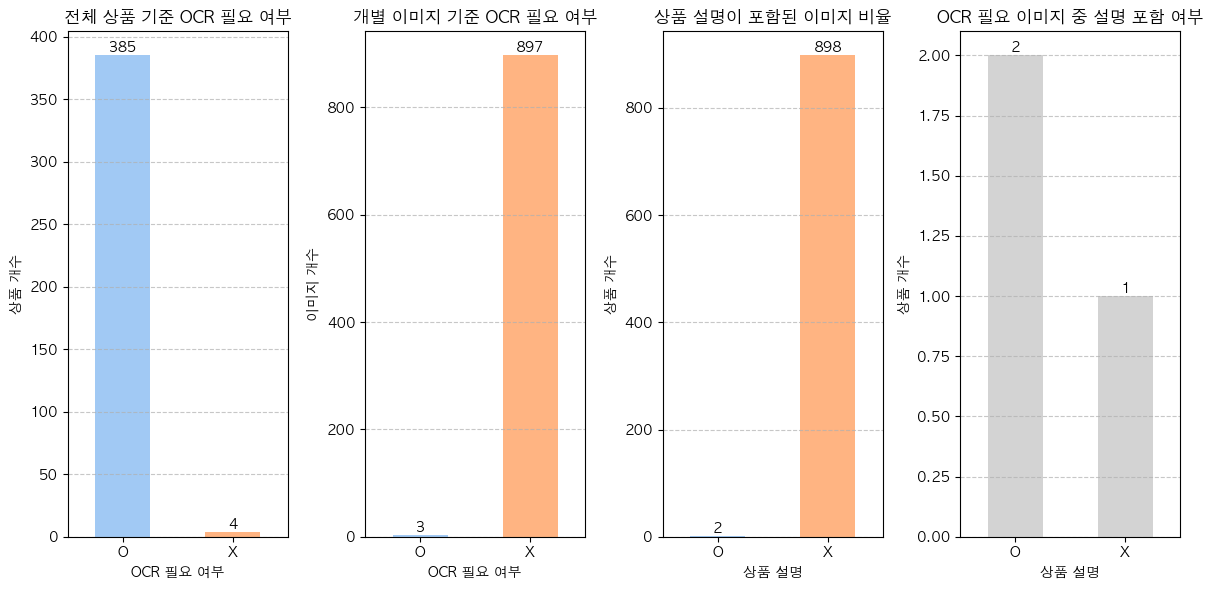

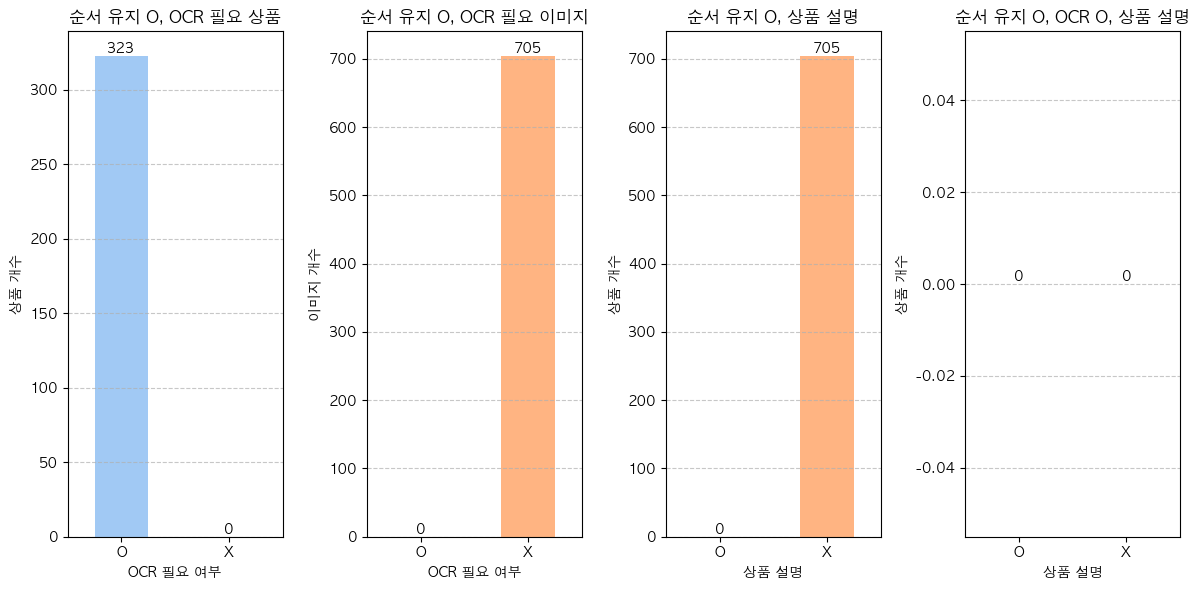

In [45]:
ocr_condition = (
    (image_df["성분 정보 여부"]=="X") &
    (image_df["영양 정보 여부"]=="X") &
    (image_df["크기 정보 제공 여부"]=="X")
)

##### 전체
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
bars = image_df[image_df["전체/개별"]=="전체"]["OCR 필요 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{int(bar.get_height())}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("전체 상품 기준 OCR 필요 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 2)
bars = image_df[(image_df["전체/개별"]=="개별") & ocr_condition]["OCR 필요 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("개별 이미지 기준 OCR 필요 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 3)
bars = image_df[(image_df["전체/개별"]=="개별") & ocr_condition]["상품 설명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("상품 설명이 포함된 이미지 비율")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = image_df[(image_df["전체/개별"]=="개별") & ocr_condition & (image_df["OCR 필요 여부"]=="O")]["상품 설명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color="lightgray")
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("OCR 필요 이미지 중 설명 포함 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

##### 순서 유지 O
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
bars = image_df[(image_df["전체/개별"]=="전체") & (image_df["순서 유지"]=="O")]["OCR 필요 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{int(bar.get_height())}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("순서 유지 O, OCR 필요 상품")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 2)
bars = image_df[(image_df["전체/개별"]=="개별") & (image_df["순서 유지"]=="O") & ocr_condition]["OCR 필요 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{int(bar.get_height())}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("순서 유지 O, OCR 필요 이미지")
plt.xticks(rotation=0, ha="center")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 3)
bars = image_df[(image_df["전체/개별"]=="개별") & (image_df["순서 유지"]=="O") & ocr_condition]["상품 설명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{int(bar.get_height())}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("순서 유지 O, 상품 설명")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = image_df[(image_df["전체/개별"]=="개별") & (image_df["순서 유지"]=="O") & ocr_condition & (image_df["OCR 필요 여부"]=="O")]["상품 설명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color="lightgray")
for bar in bars.patches:
    bars.annotate(f"{int(bar.get_height())}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("순서 유지 O, OCR O, 상품 설명")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

#####
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# bars = image_df[(image_df["전체/개별"]=="개별") & (image_df["순서 유지"]=="O") & (image_df["OCR 필요 여부"]=="O")]["성분 정보 여부"].value_counts().plot(kind="bar", color=seaborn_color)
# for bar in bars.patches:
#     bars.annotate(f"{bar.get_height()}",
#                   (bar.get_x() + bar.get_width()/2., bar.get_height()),
#                   xytext=(0, 0),
#                   textcoords="offset points",
#                   ha="center",
#                   va="bottom")
# plt.title("OCR이 필요한 이미지 중 성분/영양 정보 개수")
# plt.xticks(rotation=0, ha="center")
# plt.ylabel("이미지 개수")
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# plt.subplot(1, 2, 2)
# bars = image_df[(image_df["전체/개별"]=="개별") & (image_df["순서 유지"]=="O") & (image_df["OCR 필요 여부"]=="O")]["영양 정보 여부"].value_counts().plot(kind="bar", color=seaborn_color)
# for bar in bars.patches:
#     bars.annotate(f"{bar.get_height()}",
#                   (bar.get_x() + bar.get_width()/2., bar.get_height()),
#                   xytext=(0, 0),
#                   textcoords="offset points",
#                   ha="center",
#                   va="bottom")
# plt.title("OCR이 필요한 이미지 중 성분/영양 정보 개수")
# plt.xticks(rotation=0, ha="center")
# plt.ylabel("이미지 개수")
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()

### 크기 정보 제공 여부: O, X & 크기 정보 제공 유형
- 상품별 제공 여부 확인
- 순서 유지 확인

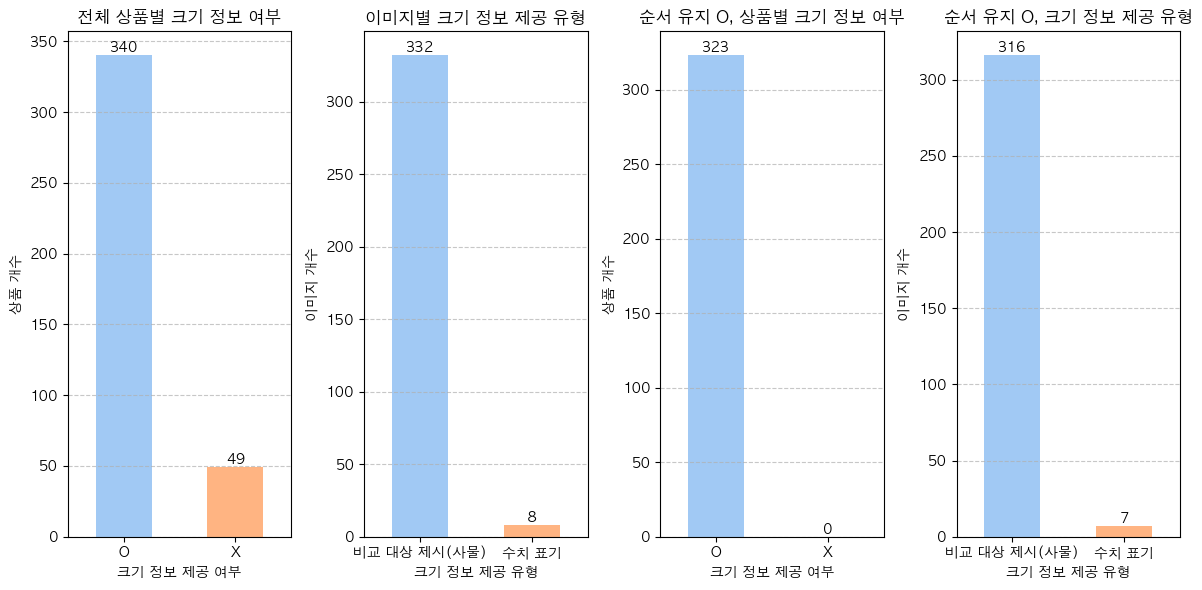

In [46]:
size_df = emart_df[["img-ID", "전체/개별", "순서 유지", "크기 정보 제공 여부", "크기 정보 제공 유형"]]

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
bars = size_df[size_df["전체/개별"]=="전체"]["크기 정보 제공 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("전체 상품별 크기 정보 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 한 상품 내에서 크기 정보를 두 번 제공하는 경우가 있음??
plt.subplot(1, 4, 2)
bars = size_df[size_df["전체/개별"]=="개별"]["크기 정보 제공 유형"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("이미지별 크기 정보 제공 유형")
plt.xticks(rotation=0, ha="center")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 3)
bars = size_df[(size_df["전체/개별"]=="전체") & (size_df["순서 유지"]=="O")]["크기 정보 제공 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{int(bar.get_height())}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("순서 유지 O, 상품별 크기 정보 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = size_df[(size_df["전체/개별"]=="개별") & (size_df["순서 유지"]=="O")]["크기 정보 제공 유형"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("순서 유지 O, 크기 정보 제공 유형")
plt.xticks(rotation=0, ha="center")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### 보관 정보: 아이콘, 보관 방법 명시, 글 내에 언급, 포장지에 포함, 성분 표기, 없음
- 성분 표기 외 별도로 표기된 상품의 비율 확인
- 순서 유지 확인

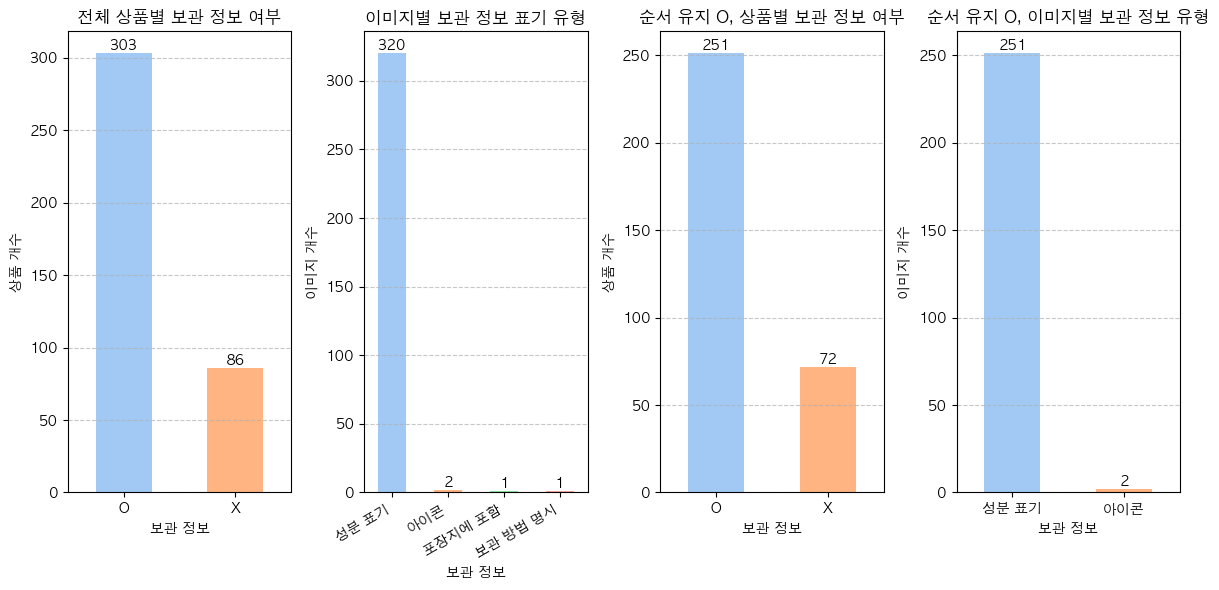

In [47]:
store_df = emart_df[["전체/개별", "순서 유지", "보관 정보"]]

plt.figure(figsize=(12, 6))

##### 전체
plt.subplot(1, 4, 1)
bars = store_df[store_df["전체/개별"]=="전체"]["보관 정보"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                  (bar.get_x() + bar.get_width()/2., bar.get_height()),
                  xytext=(0, 0),
                  textcoords="offset points",
                  ha="center",
                  va="bottom")
plt.title("전체 상품별 보관 정보 여부")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 2)
bars = store_df[(store_df["전체/개별"]=="개별") & (store_df["보관 정보"] != "없음")]["보관 정보"].str.split(', ').explode().value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=30, ha="right")
plt.ylabel("이미지 개수")
plt.title("이미지별 보관 정보 표기 유형")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

##### 순서 유지
plt.subplot(1, 4, 3)
bars = store_df[(store_df["전체/개별"]=="전체") & (store_df["순서 유지"]=="O")]["보관 정보"].str.split(', ').explode().value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.ylabel("상품 개수")
plt.title("순서 유지 O, 상품별 보관 정보 여부")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = store_df[(store_df["전체/개별"]=="개별") & (store_df["순서 유지"]=="O") & (store_df["보관 정보"] != "없음")]["보관 정보"].str.split(', ').explode().value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.ylabel("이미지 개수")
plt.title("순서 유지 O, 이미지별 보관 정보 유형")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### 성분 정보 (전체 상품)

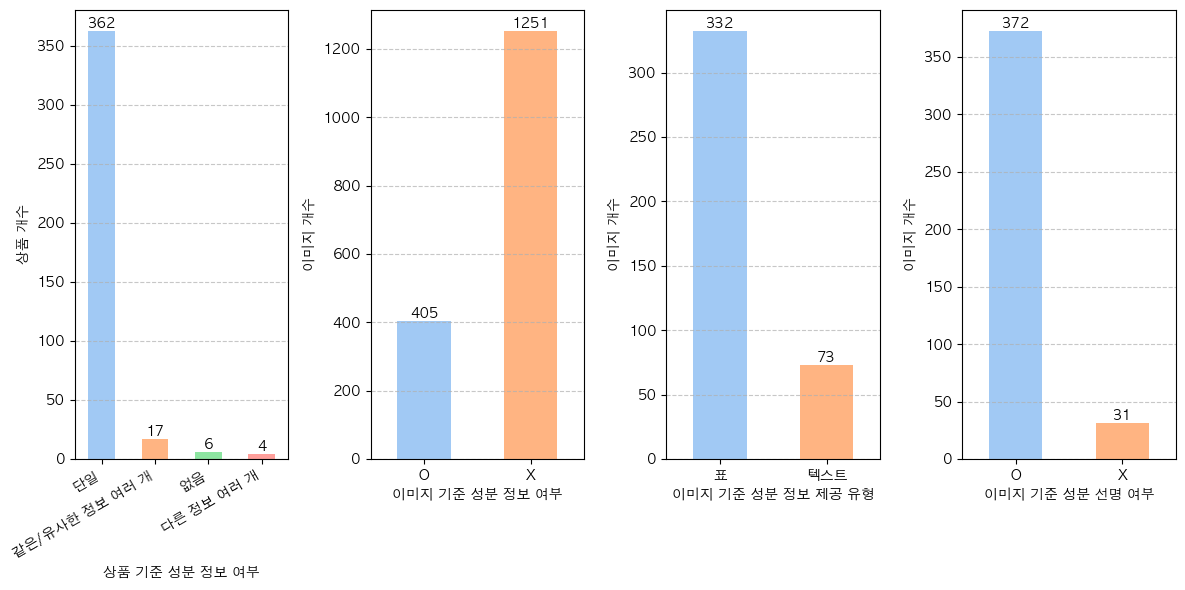

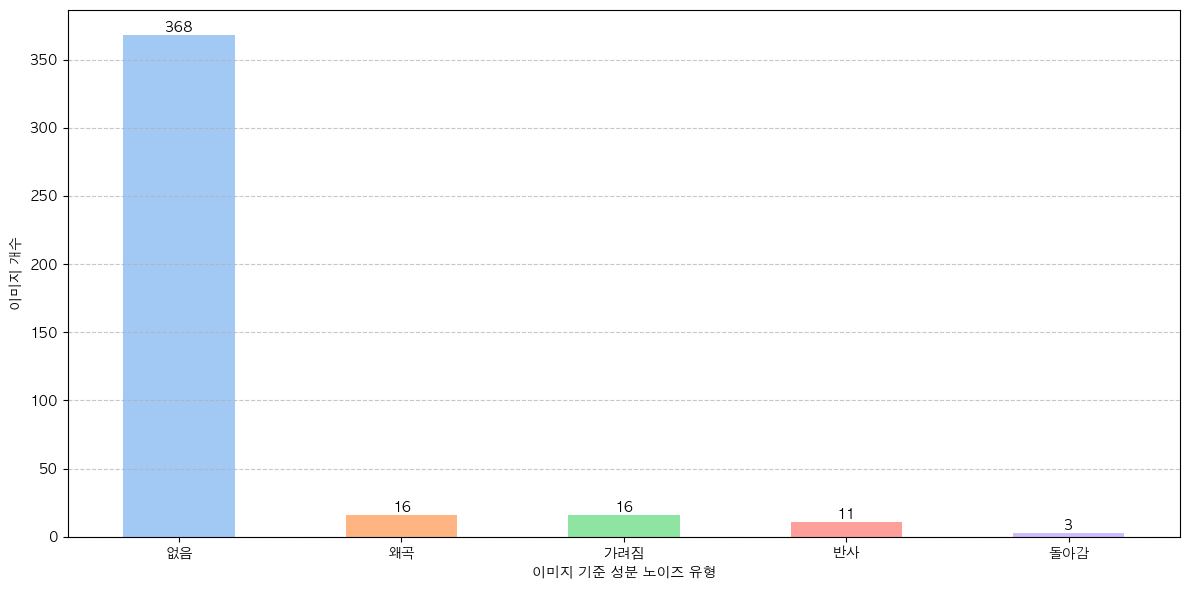

In [48]:
nutrition_df = emart_df[["전체/개별", "성분정보 개수", "성분 정보 여부", "성분 정보 양식", "성분 선명", "성분 노이즈"]].copy()

#####
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
bars = nutrition_df[(nutrition_df["전체/개별"]=="전체")]["성분정보 개수"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=30, ha="right")
plt.xlabel("상품 기준 성분 정보 여부")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 2)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별")]["성분 정보 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 정보 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 3)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별")]["성분 정보 양식"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 정보 제공 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별")]["성분 선명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 선명 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

#####
plt.figure(figsize=(12, 6))
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["성분 정보 여부"]=="O")]["성분 노이즈"].str.split(', ').explode().value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 노이즈 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### 영양 정보 (전체 상품)

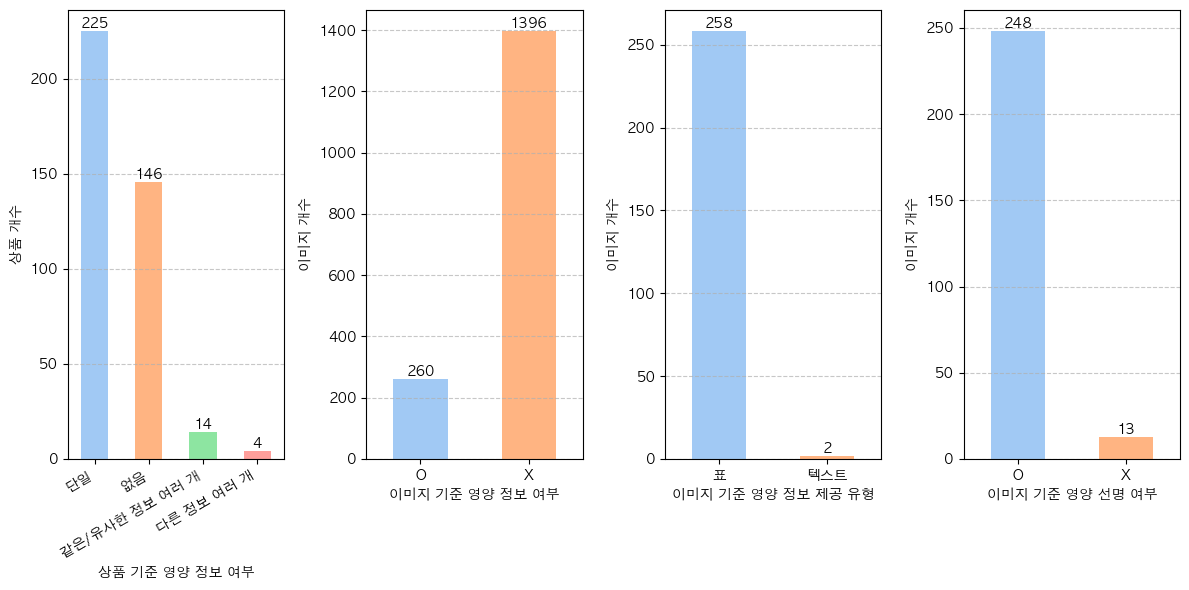

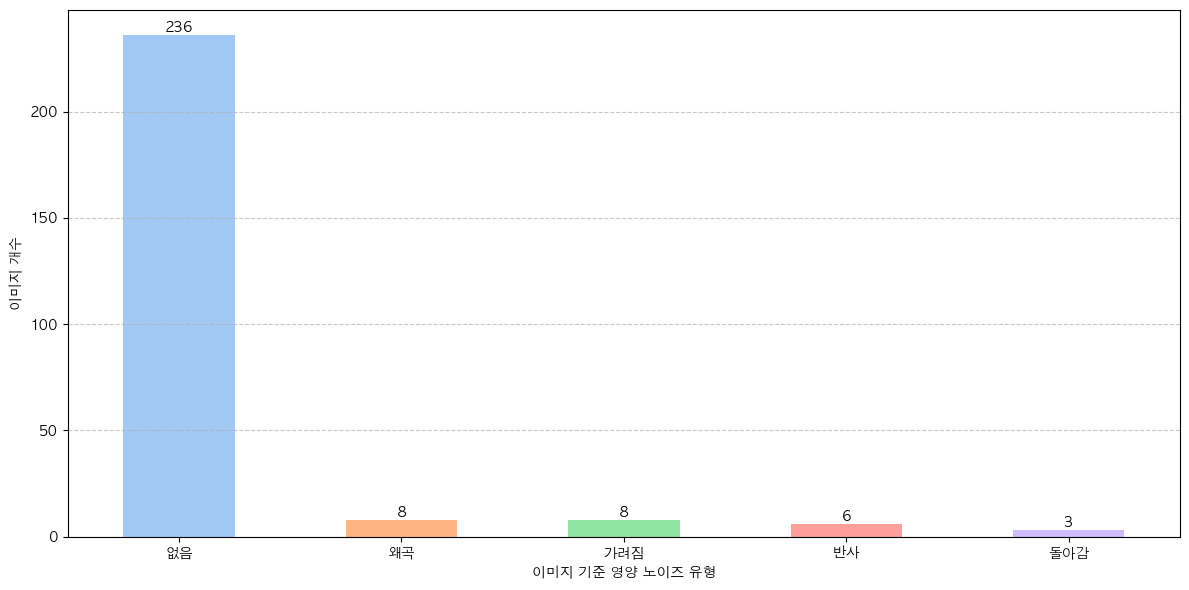

In [49]:
nutrition_df = emart_df[["전체/개별", "영양정보 개수", "영양 정보 여부", "영양 정보 양식", "영양 선명", "영양 노이즈"]].copy()

#####
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
bars = nutrition_df[(nutrition_df["전체/개별"]=="전체")]["영양정보 개수"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=30, ha="right")
plt.xlabel("상품 기준 영양 정보 여부")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 2)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별")]["영양 정보 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 정보 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 3)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별")]["영양 정보 양식"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 정보 제공 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별")]["영양 선명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 선명 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

#####
plt.figure(figsize=(12, 6))
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["영양 정보 여부"]=="O")]["영양 노이즈"].str.split(', ').explode().value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 노이즈 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### 성분 정보 (순서 유지 O)

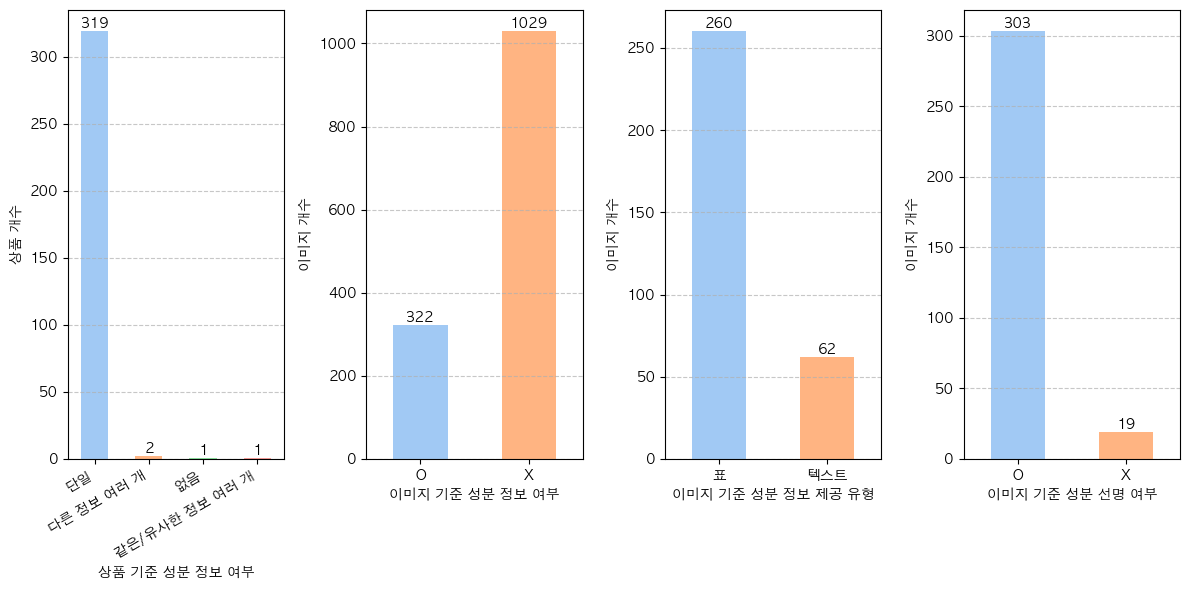

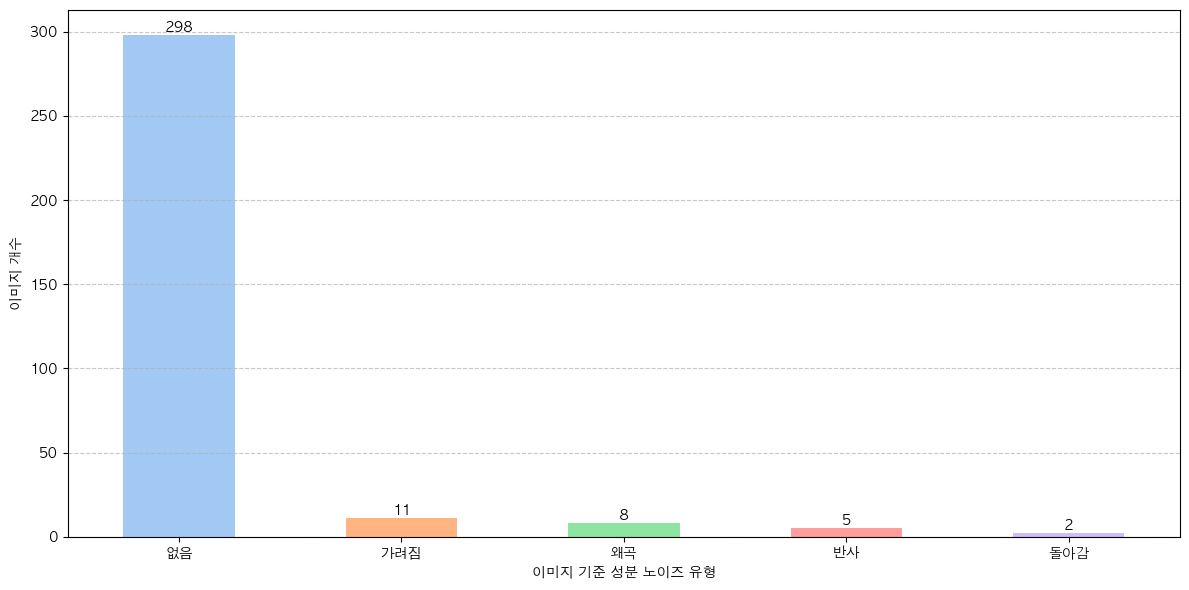

In [50]:
nutrition_df = emart_df[["전체/개별", "순서 유지", "성분정보 개수", "성분 정보 여부", "성분 정보 양식", "성분 선명", "성분 노이즈"]].copy()

#####
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
bars = nutrition_df[(nutrition_df["전체/개별"]=="전체") & (nutrition_df["순서 유지"]=="O")]["성분정보 개수"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=30, ha="right")
plt.xlabel("상품 기준 성분 정보 여부")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 2)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O")]["성분 정보 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 정보 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 3)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O")]["성분 정보 양식"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 정보 제공 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O")]["성분 선명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 선명 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

#####
plt.figure(figsize=(12, 6))
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O") & (nutrition_df["성분 정보 여부"]=="O")]["성분 노이즈"].str.split(', ').explode().value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 성분 노이즈 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### 영양 정보 (순서 유지 O)

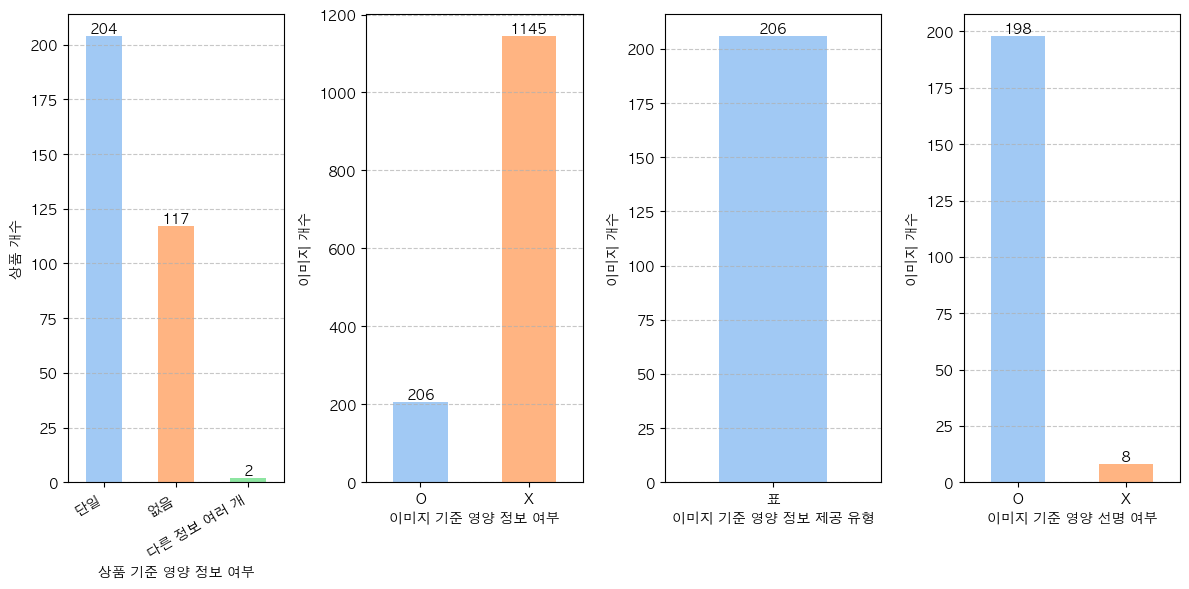

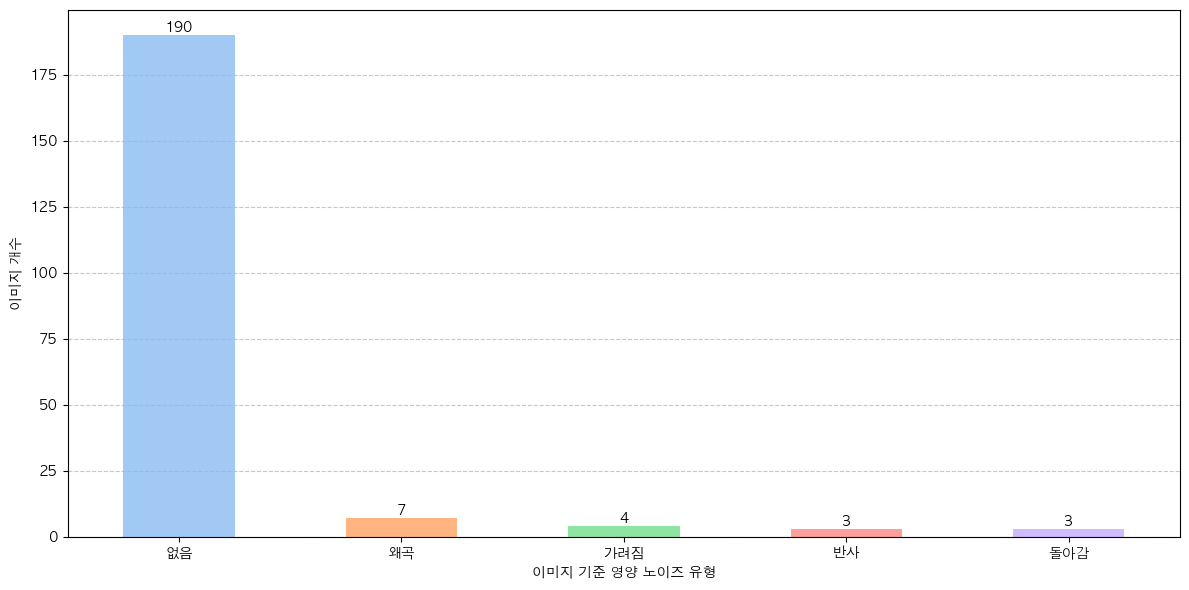

In [51]:
nutrition_df = emart_df[["전체/개별", "순서 유지", "영양정보 개수", "영양 정보 여부", "영양 정보 양식", "영양 선명", "영양 노이즈"]].copy()

#####
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
bars = nutrition_df[(nutrition_df["전체/개별"]=="전체") & (nutrition_df["순서 유지"]=="O")]["영양정보 개수"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=30, ha="right")
plt.xlabel("상품 기준 영양 정보 여부")
plt.ylabel("상품 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 2)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O")]["영양 정보 여부"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 정보 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 3)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O")]["영양 정보 양식"].value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 정보 제공 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 4, 4)
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O")]["영양 선명"].value_counts().reindex(["O", "X"]).plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 선명 여부")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

#####
plt.figure(figsize=(12, 6))
bars = nutrition_df[(nutrition_df["전체/개별"]=="개별") & (nutrition_df["순서 유지"]=="O") & (nutrition_df["영양 정보 여부"]=="O")]["영양 노이즈"].str.split(', ').explode().value_counts().plot(kind="bar", color=seaborn_color)
for bar in bars.patches:
    bars.annotate(f"{bar.get_height()}",
                (bar.get_x() + bar.get_width()/2., bar.get_height()),
                xytext=(0, 0),
                textcoords="offset points",
                ha="center",
                va="bottom")
plt.xticks(rotation=0, ha="center")
plt.xlabel("이미지 기준 영양 노이즈 유형")
plt.ylabel("이미지 개수")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### 성분 & 영양 정보 동시 제공

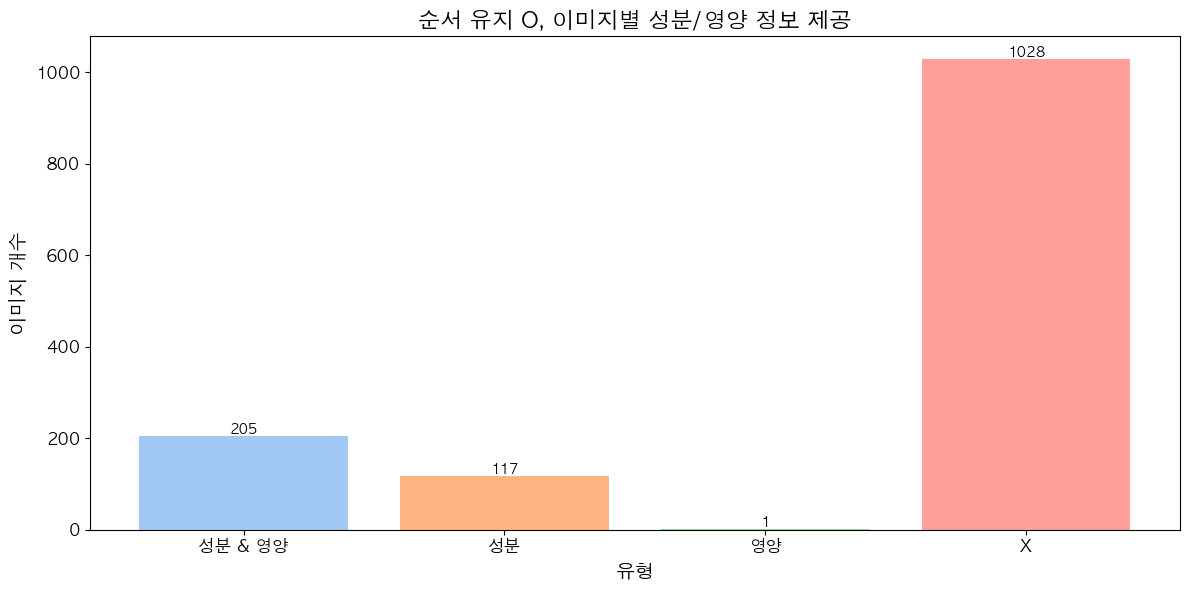

In [52]:
nutrition_df = emart_df[["전체/개별", "순서 유지", "성분 정보 여부", "영양 정보 여부"]]

both_O = (
    (nutrition_df["순서 유지"] == "O") &
    (nutrition_df["성분 정보 여부"] == "O") &
    (nutrition_df["영양 정보 여부"] == "O")
)

ingredient_O = (
    (nutrition_df["순서 유지"] == "O") &
    (nutrition_df["성분 정보 여부"] == "O") &
    (nutrition_df["영양 정보 여부"] == "X")
)

nutrition_O = (
    (nutrition_df["순서 유지"] == "O") &
    (nutrition_df["성분 정보 여부"] == "X") &
    (nutrition_df["영양 정보 여부"] == "O")
)

both_X = (
    (nutrition_df["순서 유지"] == "O") &
    (nutrition_df["성분 정보 여부"] == "X") &
    (nutrition_df["영양 정보 여부"] == "X")
)

df = pd.DataFrame({
    "유형": ["성분 & 영양", "성분", "영양", "X"],
    "이미지 개수": [
        len(nutrition_df[both_O]),
        len(nutrition_df[ingredient_O]),
        len(nutrition_df[nutrition_O]),
        len(nutrition_df[both_X])
    ]
})

plt.figure(figsize=(12, 6))
plt.bar(df["유형"], df["이미지 개수"], color=seaborn_color)
plt.title("순서 유지 O, 이미지별 성분/영양 정보 제공", fontsize=16)
plt.xlabel("유형", fontsize=14)
plt.ylabel("이미지 개수", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, count in enumerate(df["이미지 개수"]):
    plt.text(i, count+5, str(count), ha="center",)

plt.tight_layout()
plt.show()